In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('/Users/julianeoliveira/Desktop/github/Datasets from the gitcomputations/vacc_db_wc.csv')

In [18]:
df.head()

,date,uf,vaccinated_db,epi_week,country,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,vaccinated,vaccinated_second,vaccinated_single,vaccinated_third
0,2021-01-18,AL,6,103,Brazil,TOTAL,9,2629,281,111724,2629,111724,NaN,NaN,NaN,NaN
1,2021-01-18,AP,1,103,Brazil,TOTAL,9,1005,209,73626,1005,73626,NaN,NaN,NaN,NaN
2,2021-01-18,BA,22,103,Brazil,TOTAL,29,9667,2548,540320,9667,540320,NaN,NaN,NaN,NaN
3,2021-01-18,CE,6,103,Brazil,TOTAL,17,10240,2138,356117,10223,353979,11.0,NaN,NaN,NaN
4,2021-01-18,DF,3,103,Brazil,TOTAL,6,4427,1047,265274,4427,265274,NaN,NaN,NaN,NaN


In [ ]:
df = df.fillna(0)

In [ ]:
df['new']= df.vaccinated_single + df.vaccinated_second + df.vaccinated_third

In [ ]:
df[df.uf == 'AL'].filter(['new','vaccinated_db','vaccinated','vaccinated_second','vaccinated_single','vaccinated_third'])

In [ ]:
fig, ax1 = plt.subplots(nrows=1, figsize=(20,6), sharex=True, sharey=False)

plt.subplots_adjust(wspace=1.5)

s='BA'

langs = pd.to_datetime(df[df.uf == s].date)


ax1.plot(langs, df[df.uf == s].vaccinated_db,label= s+' db',color = 'green')
ax1.plot(langs, new,label=s + ' wcota',color = 'blue')
#ax1.plot(langs, df2['RTAC_high'],color = 'green')
ax1.legend()
#ax1.fill_between(langs,df2['RTBA_low'].rolling(window=10).mean(), df2['RTBA_high'].rolling(window=10).mean(), color = 'green',alpha=0.2)
#ax1.axhline(y=1)
#ax1.set_ylim((0, 10))

#ax2.plot(langs, df2['RTRO'].rolling(window=7).mean(),label='RO',color = 'green')
#ax2.legend()
#ax2.fill_between(langs,df2['RTRO_low'].rolling(window=10).mean(), df2['RTRO_high'].rolling(window=10).mean(), color = 'green',alpha=0.2)
#ax2.axhline(y=1)
#ax2.set_ylim((0, 10))

In [2]:
# Dose counting

In [99]:
dose = pd.read_excel('/Users/julianeoliveira/Desktop/github/Datasets from the gitcomputations/novo.xlsx')

In [100]:
dose

,date,dose,quantidade aplicada
0,NaN,NaN,0
1,1899-12-30,1ª Dose,1
2,1900-08-21,1ª Dose,1
3,1923-06-02,1ª Dose,1
4,1937-01-25,2ª Dose,1
...,...,...,...
1483,2021-09-24,Única,36
1484,2021-09-24,Dose,161
1485,2021-09-24,1ª Dose,258623
1486,2021-09-25,1ª Dose,5


In [88]:
table_dose = pd.pivot_table(dose, values='quantidade aplicada', index=['date'], columns=['dose'])

In [90]:
table_dose =table_dose.fillna(0).reset_index()

In [91]:
table_dose

dose,date,1ª Dose,1ª Dose Revacinação,1º Reforço,2ª Dose,2ª Dose Revacinação,3ª Dose,Dose,Dose Adicional,Dose Inicial,Reforço,Única
0,2021-01-18,2169.0,0.0,0.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-19,59566.0,0.0,0.0,278.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2021-01-20,341283.0,0.0,0.0,725.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
3,2021-01-21,381782.0,0.0,0.0,763.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,2021-01-22,342710.0,0.0,0.0,1223.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
246,2021-09-21,279006.0,1.0,497.0,757455.0,0.0,8373.0,413.0,2676.0,0.0,34280.0,29.0
247,2021-09-22,308090.0,3.0,365.0,643601.0,55.0,7676.0,303.0,3781.0,2.0,45649.0,93.0
248,2021-09-23,244351.0,7.0,383.0,611105.0,0.0,4706.0,237.0,5591.0,0.0,49024.0,56.0
249,2021-09-24,258623.0,0.0,200.0,447660.0,0.0,2803.0,161.0,4434.0,0.0,39420.0,36.0


In [6]:
dose.dose.unique()

array([nan, '1ª Dose', '2ª Dose', 'Dose', 'Única', 'Reforço', '3ª Dose',
       'Dose Adicional', 'Dose Inicial', '2ª Dose Revacinação',
       '1ª Dose Revacinação', '1º Reforço'], dtype=object)

In [101]:
dose = dose[dose.date>= '2021-01-18']

In [102]:
dose[(dose.dose == '1ª Dose') ]

,date,dose,quantidade aplicada
202,2021-01-18,1ª Dose,2169
205,2021-01-19,1ª Dose,59566
208,2021-01-20,1ª Dose,341283
210,2021-01-21,1ª Dose,381782
213,2021-01-22,1ª Dose,342710
...,...,...,...
1455,2021-09-21,1ª Dose,279006
1464,2021-09-22,1ª Dose,308090
1472,2021-09-23,1ª Dose,244351
1485,2021-09-24,1ª Dose,258623


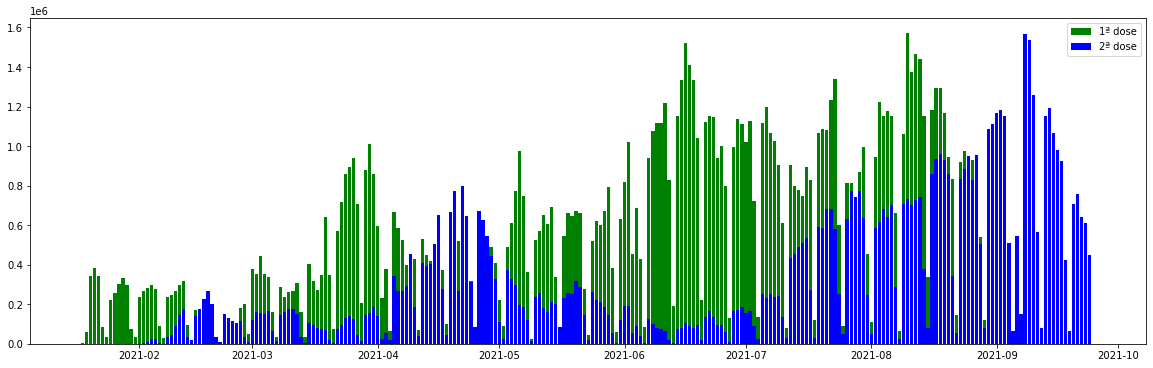

In [38]:
fig, ax1 = plt.subplots(nrows=1, figsize=(20,6), sharex=True, sharey=False)

plt.subplots_adjust(wspace=1.5)


langs = pd.to_datetime(dose[dose.dose == '1ª Dose'].date)


ax1.bar(langs, dose[dose.dose == '1ª Dose']['quantidade aplicada'],label= '1ª dose',color = 'green')
ax1.bar(langs, dose[dose.dose == '2ª Dose']['quantidade aplicada'],label= '2ª dose',color = 'blue')
#ax1.plot(langs, dose[dose.dose == 'Única']['quantidade aplicada'],color = 'green')
ax1.legend()
#ax1.fill_between(langs,df2['RTBA_low'].rolling(window=10).mean(), df2['RTBA_high'].rolling(window=10).mean(), color = 'green',alpha=0.2)
#ax1.axhline(y=1)
#ax1.set_ylim((0, 10))

#ax2.plot(langs, df2['RTRO'].rolling(window=7).mean(),label='RO',color = 'green')
#ax2.legend()
#ax2.fill_between(langs,df2['RTRO_low'].rolling(window=10).mean(), df2['RTRO_high'].rolling(window=10).mean(), color = 'green',alpha=0.2)
#ax2.axhline(y=1)
#ax2.set_ylim((0, 10))

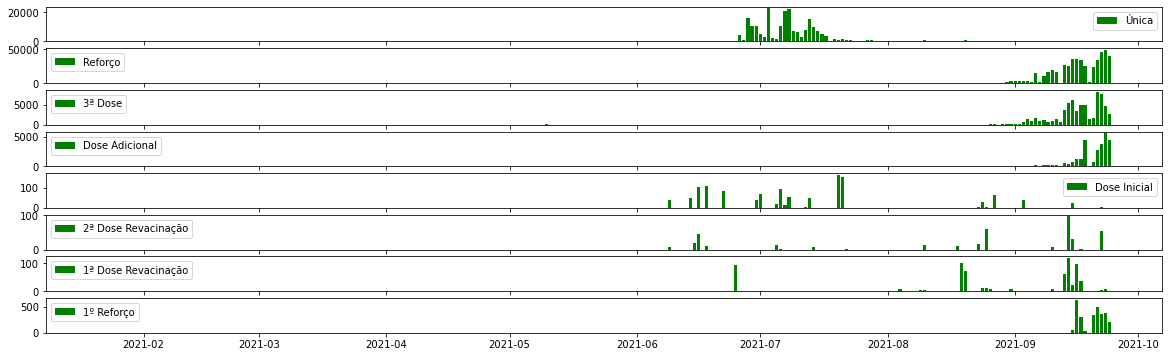

In [83]:
fig, [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8] = plt.subplots(nrows=8, figsize=(20,6), sharex=True, sharey=False)

plt.subplots_adjust(wspace=1.5)


langs = pd.to_datetime(dose[dose.dose == 'Única'].date)

ax1.bar(langs, dose[dose.dose == 'Única']['quantidade aplicada'],label= 'Única', color = 'green')
ax1.legend()


ax2.bar(pd.to_datetime(dose[dose.dose == 'Reforço'].date), dose[dose.dose == 'Reforço']['quantidade aplicada'],
        label= 'Reforço', color = 'green')
ax2.legend()

ax3.bar(pd.to_datetime(dose[dose.dose == '3ª Dose'].date), dose[dose.dose == '3ª Dose']['quantidade aplicada'],
        label= '3ª Dose', color = 'green')
ax3.legend()

ax4.bar(pd.to_datetime(dose[dose.dose == 'Dose Adicional'].date), dose[dose.dose == 'Dose Adicional']['quantidade aplicada'],
        label= 'Dose Adicional', color = 'green')
ax4.legend()

ax5.bar(pd.to_datetime(dose[dose.dose == 'Dose Inicial'].date), dose[dose.dose == 'Dose Inicial']['quantidade aplicada'],
        label= 'Dose Inicial', color = 'green')
ax5.legend()

ax6.bar(pd.to_datetime(dose[dose.dose == '2ª Dose Revacinação'].date), dose[dose.dose == '2ª Dose Revacinação']['quantidade aplicada'],
        label= '2ª Dose Revacinação', color = 'green')
ax6.legend()


ax7.bar(pd.to_datetime(dose[dose.dose == '1ª Dose Revacinação'].date), dose[dose.dose == '1ª Dose Revacinação']['quantidade aplicada'],
      label= '1ª Dose Revacinação', color = 'green')
ax7.legend()

ax8.bar(pd.to_datetime(dose[dose.dose == '1º Reforço'].date), dose[dose.dose == '1º Reforço']['quantidade aplicada'],
        label= '1º Reforço', color = 'green')
ax8.legend()

ax9.bar(pd.to_datetime(dose[dose.dose == 'Dose'].date), dose[dose.dose == 'Dose']['quantidade aplicada'],
        label= 'Dose', color = 'green')
ax9.legend()

In [103]:
dose[dose.dose == '1ª Dose']['quantidade aplicada'].sum()

137521694

In [87]:
dose[dose.dose == 'Dose Inicial']['quantidade aplicada'].sum()

1219

In [84]:
dose[dose.dose == 'Dose Adicional']['quantidade aplicada'].sum()

28091

In [85]:
dose[dose.dose == 'Reforço']['quantidade aplicada'].sum()

471706

In [ ]:
1 Doses aplicadas e registradas na base nacional do Programa Nacional de Imunizações (PNI).

2 Doses aplicadas, informadas nos painéis da Secretarias Estaduais, aguardando registro na base nacional. Atualizado uma vez ao dia. Informação por estado.

3 Total de doses aplicadas considerando as informações da na base nacional do Programa Nacional de Imunizações (PNI) ou dos painéis da Secretarias Estaduais, considerando o dado mais atualizado. Atualizado uma vez ao dia. Informação por estado.

4 DA - Imunossuprimidos que receberam mais uma dose, além das duas normais ou dose única.

5 DR - Idosos e outras pessoas que receberam mais uma dose, além das duas normais ou dose única

6 Doses entregues, pelo Ministério da Saúde, aos estados há mais de 7 dias.

7 Doses enviadas, pelo Ministério da Saúde, aos estados, nos últimos 7 dias, e em processo de distribuição aos municípios pelos estados.

In [61]:
dose[dose.dose == 'Única']['quantidade aplicada'].sum() + dose[dose.dose == '2ª Dose']['quantidade aplicada'].sum()

75594084

In [ ]:
'1ª Dose', '2ª Dose', 'Dose', 'Única', 'Reforço', '3ª Dose',
       'Dose Adicional', 'Dose Inicial', '2ª Dose Revacinação',
       '1ª Dose Revacinação', '1º Reforço'

In [67]:
data = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")
data = data[data["state"] == "TOTAL"]

In [75]:
data

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9,2020-02-27,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9,2020-02-28,Brazil,TOTAL,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2020-02-29,Brazil,TOTAL,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16169,141,2021-10-10,Brazil,TOTAL,TOTAL,151,601285,8412,21580535,601011,...,57522913.0,26965.84927,149512793.0,70.08928,94740950.0,44.41309,4779931.0,2.24076,3116010.0,1.46074
16197,141,2021-10-11,Brazil,TOTAL,TOTAL,206,601491,6817,21587352,601213,...,57522913.0,26965.84927,149798664.0,70.22329,95303186.0,44.67666,4781832.0,2.24165,3281210.0,1.53818
16225,141,2021-10-12,Brazil,TOTAL,TOTAL,176,601667,7531,21594883,601398,...,64511151.0,30241.82684,149910126.0,70.27554,95541278.0,44.78827,4783024.0,2.24221,3326730.0,1.55952
16253,141,2021-10-13,Brazil,TOTAL,TOTAL,206,601873,8372,21603255,601574,...,64511151.0,30241.82684,150017038.0,70.32566,96082338.0,45.04191,4781754.0,2.24161,3545399.0,1.66203


In [76]:
data['vaccinated']#.diff().sum()

1                NaN
3                NaN
5                NaN
7                NaN
9                NaN
            ...     
16169    149512793.0
16197    149798664.0
16225    149910126.0
16253    150017038.0
16281    150742736.0
Name: vaccinated, Length: 598, dtype: float64

In [77]:
data['vaccinated_single']#.diff().sum() + data['vaccinated_second'].diff().sum()

1              NaN
3              NaN
5              NaN
7              NaN
9              NaN
           ...    
16169    4779931.0
16197    4781832.0
16225    4783024.0
16253    4781754.0
16281    4784252.0
Name: vaccinated_single, Length: 598, dtype: float64

In [78]:
data['vaccinated_second']

1               NaN
3               NaN
5               NaN
7               NaN
9               NaN
            ...    
16169    94740950.0
16197    95303186.0
16225    95541278.0
16253    96082338.0
16281    97480114.0
Name: vaccinated_second, Length: 598, dtype: float64

In [79]:
4784252 + 97480114

102264366

In [ ]:
total vacinados por wcota = 150.742.736

total vacinados base vacinação (nossa e atualizada em 25/09/2021) = 217.873.847

total vacinados pelo site do MS = 247.067.891

In [ ]:
total vacinados por wcota dose unica e segunda = 102.264.366

total vacinados base vacinação (nossa e atualizada em 25/09/2021) = 75.594.084

total vacinados pelo site do MS = 100.280.181

In [93]:
df1 = pd.read_csv('/Users/julianeoliveira/Desktop/github/Datasets from the gitcomputations/doses_/doses_primeira_segunda_unica_/primeira_dose_uf.csv')

In [98]:
df1.head()

,date,uf,primeira_dose
0,2021-01-18,RS,212
1,2021-01-18,MS,25
2,2021-01-18,SC,21
3,2021-01-18,BA,120
4,2021-01-18,AM,12


In [97]:
df1.uf.unique()

array(['RS', 'MS', 'SC', 'BA', 'AM', 'SP', 'MT', 'ES', 'MG', 'RR', 'CE',
       'AP', 'PB', 'SE', 'MA', 'PI', 'RJ', 'RN', 'TO', 'AL', 'RO', 'PA',
       nan, 'AC', 'DF', 'PE', 'PR', 'GO', 'XX'], dtype=object)

In [96]:
df1.primeira_dose.sum()

217873847

In [ ]:
217.873.847

146.440.107